# Overview

The goal of this project is to train a machine learning classification algorithm to recognize and correctly classify handwritten digits. The basic outline will be as follows:
<ol>
<li>Import the data</li>
<li>Figure out a way to convert the image data into vectors</li>
<li>Split the converted data into a training set, a CV set, and a test set.</li>
<li>Train the algorithm on the test set.</li>
<li>Check the accuracy on the CV set.</li>
<li>Test the algorithm on the test set.</li>
</ol>

# 1. Importing the Data

As it is supplied, the data is actually already in vector format. I've saved it as a file called ``train.csv``. Each image is 28 x 28 pixels, which equals 784 pixels total. As a result, the feature vector for each sample should have 784 elements. The pixel value ranges from 0 (light) to 255 (dark). The first column in the ``train.csv`` file is the label for that image, so we'll have to save that in the ``y`` vector.

In [60]:
# set up the libraries for loading and visualizing the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [61]:
data = pd.read_csv('train.csv')

In [62]:
data = data.loc[0:10000]

In [63]:
data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
y = data['label'] # create label vector

In [65]:
X = data.drop('label',axis=1) # create X vector of samples

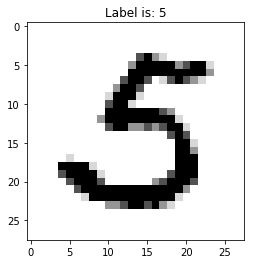

In [66]:
# Convert an array into an image
i = 557;
# isolate the data of interest
test_img = X.loc[i]

# convert into a matrix
vec = np.asarray(test_img).reshape((28,28))

# convert to image
plt.imshow(vec,interpolation='nearest',cmap="Greys")

# Add label to the title of the pic
plt.title("Label is: %d" % y.loc[i])

# 3. Split the Data into Training, CV, and Test Sets

I am going to use sklearn to train a logistic regression classifier. I can also use sklearn to split the ``train.csv`` data into training, cross validation (CV), and test sets. 

In [67]:
# import libraries
from sklearn.model_selection import train_test_split

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42)

In [69]:
X_train.shape # size of the training set

(6700, 784)

In [70]:
X_test.shape # size of the test set

(3301, 784)

# 4. Train the Algorithm on the Training Set

I'm going to use a logistic regression classifier to classify this data.

In [71]:
# import logistic regression model
from sklearn import linear_model
logreg = linear_model.LogisticRegression(multi_class='multinomial',solver='newton-cg');

# train the logistic regression classifier
logreg.fit(X_train,y_train);

# find predictions using this classifier
y_pred = logreg.predict(X_test)


/usr/lib/python3/dist-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


In [72]:
# find the score of the classifier

# import library
from sklearn.metrics import accuracy_score

# find the score
pred_score = accuracy_score(y_test,y_pred)

In [73]:
pred_score

0.86186004241139047

In [38]:
y_test

1501    9
2586    9
2653    7
1055    8
705     8
106     8
589     5
2468    2
2413    6
1600    4
2464    4
228     3
915     5
794     2
3021    4
3543    2
1073    1
3351    7
1744    3
1084    6
926     2
3049    2
1117    6
642     1
4768    6
501     9
4066    5
333     3
4685    1
486     0
       ..
266     6
2366    0
1114    7
63      0
2592    1
2788    0
2757    8
3011    6
3076    5
2998    2
2815    7
2259    3
4959    4
3204    7
1237    7
103     7
2643    9
272     0
508     0
2226    2
4934    5
2441    7
865     4
3326    9
908     2
2114    9
3896    4
1627    5
2873    4
1522    4
Name: label, Length: 1651, dtype: int64

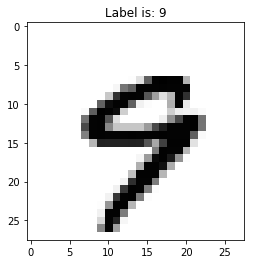

In [53]:
# Convert an array into an image
i = 2586;
# isolate the data of interest
test_img = X.loc[i]

# convert into a matrix
vec = np.asarray(test_img).reshape((28,28))

# convert to image
plt.imshow(vec,interpolation='nearest',cmap="Greys")

# Add label to the title of the pic
plt.title("Label is: %d" % y.loc[i])

In [48]:
y_pred.size

1651

In [49]:
y_test.size

1651

In [58]:
y_pred[55]

7

In [59]:
y_test.values[55]

8